# ***ACIES GLOBAL***
> ## ***Shruti A***

##### ***Import libraries and data***

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
sales = pd.read_csv('/content/sample_data/SalesData.csv')

In [296]:
sales.head()

,BA Code,Sales Invoice No,Sales Invoice Date,Salesman Code,Sales Route Code,Group Code,Class Name,Brand Group Name,Product Group Name,Product Code,Product Quantity in Box,Product Quantity in Nos,Total Product Quantity in Cases,Product Scheme Discount,Product Name,Sales Route Name
0,25591,K1605964,2017-01-21,SM01,SR002,GOI,Signature,Dheepam,DHEEPAM 1Ltr,LAMPTB01F,1,0,1.0,0.00,DPM LAMP OIL-1LT PET-AGAL VILLAKKU OFFER,THIRUPORUR
1,25591,K1605963,2017-01-21,SM01,SR002,GGK,Signature,Dheepam,DHEEPAM 1Ltr,LAMPTB01F,1,0,1.0,0.00,DPM LAMP OIL-1LT PET-AGAL VILLAKKU OFFER,THIRUPORUR
2,25591,K1605963,2017-01-21,SM01,SR002,GGK,Signature,Orysa,ORYSA 1 LTR,RRBFMA01,1,0,1.0,0.00,RRB ORYSA -1 LTR -REG-POUCH,THIRUPORUR
3,25591,K1605963,2017-01-21,SM01,SR002,GGK,Signature,RSF,RSF 1Ltr,RSFFMD01C,20,0,20.0,214.23,Rsf Oil-GW-1 Ltr Box-VD3 -VSP 50 ML FREE,THIRUPORUR
4,25591,K1605963,2017-01-21,SM01,SR002,GGK,Signature,RSF,RSF 500ML,RSFFMD02,10,0,10.0,109.78,Rsf Oil-GW-1/2 Ltr Pouch Box-VD3,THIRUPORUR


##### ***1.   What is the relationship between Product Quantity in Box, Product Quantity in Nos, Total Product Quantity in Cases, Product Scheme Discount (for ex. pairplot)?***

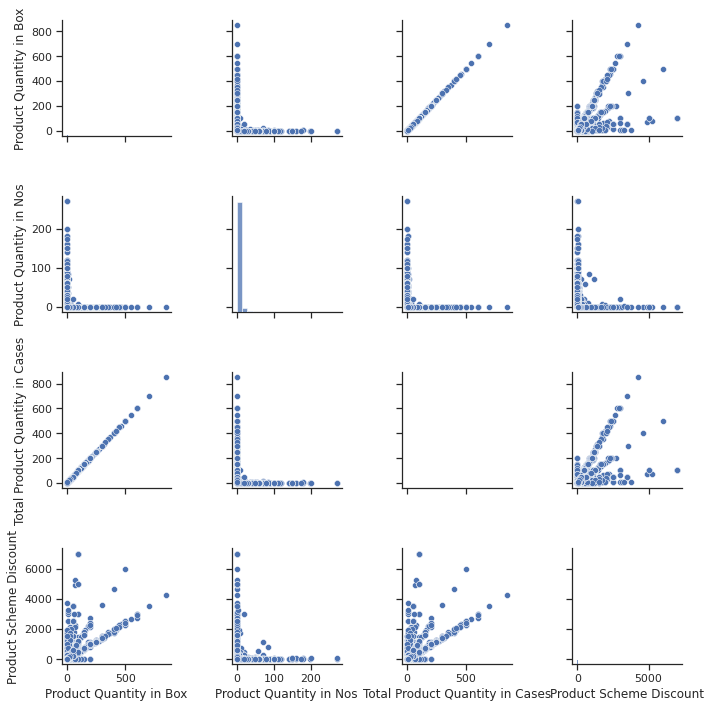

In [267]:
sns.pairplot(sales, vars=["Product Quantity in Box", "Product Quantity in Nos", "Total Product Quantity in Cases", "Product Scheme Discount"])

In [268]:
sales_df = sales[["Product Quantity in Box", "Product Quantity in Nos", "Total Product Quantity in Cases", "Product Scheme Discount"]].copy()

In [269]:
corr = sales_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Product Quantity in Box,Product Quantity in Nos,Total Product Quantity in Cases,Product Scheme Discount
Product Quantity in Box,1.000000,-0.105462,0.999969,0.755299
Product Quantity in Nos,-0.105462,1.000000,-0.100482,-0.112724
Total Product Quantity in Cases,0.999969,-0.100482,1.000000,0.755032
Product Scheme Discount,0.755299,-0.112724,0.755032,1.000000


>*The correlation is **negative** between:* <br>
*1. Product Quantity in Nos and Product Quantity in Box* <br>
*2. Product Quantity in Nos and Total Product Quantity in Cases*<br>
*3. Product Quantity in Nos and Product Scheme Discount*<br>

>*and is positive for the remaining.<br>So, the correlation between **any variable and the Product Quantity in Nos** is negative.*

##### ***2. How are the trends over time "Product Scheme Discount"?***

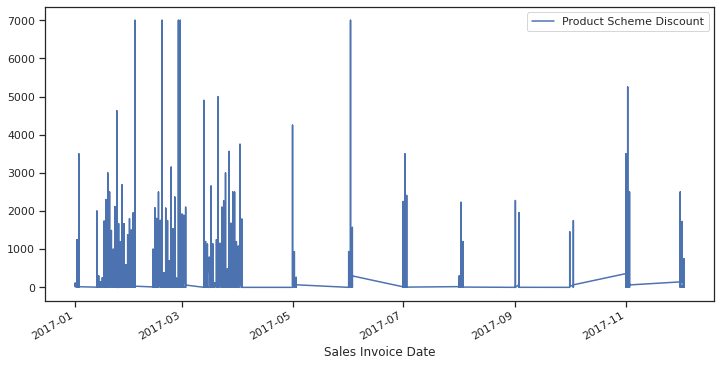

In [270]:
sales['Sales Invoice Date'] = pd.to_datetime(sales['Sales Invoice Date']) # convert date column to DateTime
ax = sales.plot(x='Sales Invoice Date', y='Product Scheme Discount', figsize=(12,6))

In [271]:
sales_pt = sales[['Product Scheme Discount', 'Sales Invoice Date']].copy()

In [272]:
sales_pt.head()

,Product Scheme Discount,Sales Invoice Date
0,0.00,2017-01-21
1,0.00,2017-01-21
2,0.00,2017-01-21
3,214.23,2017-01-21
4,109.78,2017-01-21


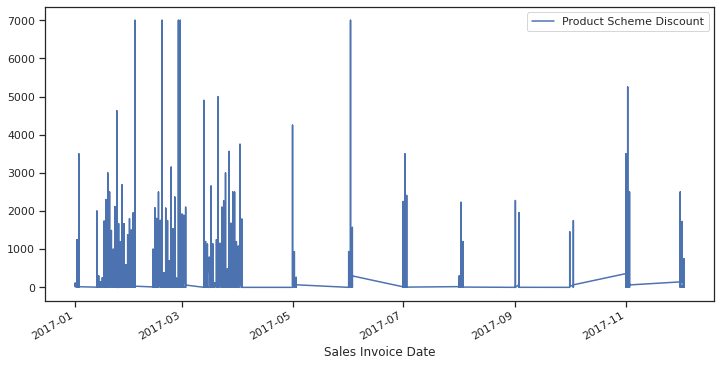

In [273]:
sales_pt.plot(x='Sales Invoice Date', y='Product Scheme Discount', figsize=(12,6))

##### ***3. What is the most popular product?***

In [274]:
sales_calc = sales[['Product Code', 'Product Name', 'Product Quantity in Box', 'Product Quantity in Nos', 'Total Product Quantity in Cases']].copy()
sales_calc.head()

,Product Code,Product Name,Product Quantity in Box,Product Quantity in Nos,Total Product Quantity in Cases
0,LAMPTB01F,DPM LAMP OIL-1LT PET-AGAL VILLAKKU OFFER,1,0,1.0
1,LAMPTB01F,DPM LAMP OIL-1LT PET-AGAL VILLAKKU OFFER,1,0,1.0
2,RRBFMA01,RRB ORYSA -1 LTR -REG-POUCH,1,0,1.0
3,RSFFMD01C,Rsf Oil-GW-1 Ltr Box-VD3 -VSP 50 ML FREE,20,0,20.0
4,RSFFMD02,Rsf Oil-GW-1/2 Ltr Pouch Box-VD3,10,0,10.0


In [275]:
sales_calc['Total Sold'] = sales[['Product Quantity in Box', 'Product Quantity in Nos', 'Total Product Quantity in Cases']].sum(axis=1)
sales_calc.drop(['Product Quantity in Box', 'Product Quantity in Nos', 'Total Product Quantity in Cases'], axis=1)
sales_calc.head()

,Product Code,Product Name,Product Quantity in Box,Product Quantity in Nos,Total Product Quantity in Cases,Total Sold
0,LAMPTB01F,DPM LAMP OIL-1LT PET-AGAL VILLAKKU OFFER,1,0,1.0,2.0
1,LAMPTB01F,DPM LAMP OIL-1LT PET-AGAL VILLAKKU OFFER,1,0,1.0,2.0
2,RRBFMA01,RRB ORYSA -1 LTR -REG-POUCH,1,0,1.0,2.0
3,RSFFMD01C,Rsf Oil-GW-1 Ltr Box-VD3 -VSP 50 ML FREE,20,0,20.0,40.0
4,RSFFMD02,Rsf Oil-GW-1/2 Ltr Pouch Box-VD3,10,0,10.0,20.0


In [276]:
pop = sales_calc.max()
pop

Product Code                                           VSPTNA06
Product Name                       VANASPATI-GW-50 ML POUCH BOX
Product Quantity in Box                                     850
Product Quantity in Nos                                     270
Total Product Quantity in Cases                           850.0
Total Sold                                               1700.0
dtype: object

In [277]:
print("The most popular product is: \n", 
      "Product Name:               ", pop["Product Name"], "\n Product Code:               ", pop["Product Code"], "\n With a Total Sales of:      ", pop["Total Sold"])

The most popular product is: 
 Product Name:                VANASPATI-GW-50 ML POUCH BOX 
 Product Code:                VSPTNA06 
 With a Total Sales of:       1700.0


> *We take the sum of the Product Quantity in Box, Product Quantity in Nos and Total Product Quantity in Cases and find the Total Quantity Sold, to determine the most popular product. The most popular product is **VANASPATI-GW-50 ML POUCH BOX**.*

##### ***4. Who is the most successful BA, Salesman?***

In [278]:
sales_check = sales[['BA Code', 'Salesman Code', 'Product Quantity in Box', 'Product Quantity in Nos', 'Total Product Quantity in Cases']].copy()
sales_check['Total Sold'] = sales[['Product Quantity in Box', 'Product Quantity in Nos', 'Total Product Quantity in Cases']].sum(axis=1)
sales_check.head()

,BA Code,Salesman Code,Product Quantity in Box,Product Quantity in Nos,Total Product Quantity in Cases,Total Sold
0,25591,SM01,1,0,1.0,2.0
1,25591,SM01,1,0,1.0,2.0
2,25591,SM01,1,0,1.0,2.0
3,25591,SM01,20,0,20.0,40.0
4,25591,SM01,10,0,10.0,20.0


###### *(i) BA*

In [279]:
salesBA = sales_check.drop(['Salesman Code', 'Product Quantity in Box', 'Product Quantity in Nos', 'Total Product Quantity in Cases'], axis=1)
salesBA.head()

,BA Code,Total Sold
0,25591,2.0
1,25591,2.0
2,25591,2.0
3,25591,40.0
4,25591,20.0


In [280]:
sales_BA = sales_check.groupby(['BA Code'])['Total Sold'].sum()

In [281]:
sales_BA.to_csv('BA.csv') 

In [282]:
data1 = pd.read_csv('/content/BA.csv')
data2 = pd.read_csv('/content/sample_data/Mapping.csv')
data2 = data2.drop(['Salesman Name', 'Salesman Code'], axis = 1)
data2.head()
salesBA = pd.merge(data1, data2, 
                   on='BA Code', 
                   how='left')
salesBA.head()

,BA Code,Total Sold,BA Name
0,22520,141832.4111,Ganesh Agencies(BA)
1,22520,141832.4111,Ganesh Agencies(BA)
2,22520,141832.4111,Ganesh Agencies(BA)
3,22520,141832.4111,Ganesh Agencies(BA)
4,22591,209316.2495,Eswari Agency(BA)


In [283]:
sales_BA = salesBA.drop_duplicates()
sales_BA.head()

,BA Code,Total Sold,BA Name
0,22520,141832.4111,Ganesh Agencies(BA)
4,22591,209316.2495,Eswari Agency(BA)
8,22641,208885.3723,Lakshmi Agencies(BA)
10,22644,140208.3872,Shrii Balaji Enterprises(BA)
12,22657,158485.8287,Jeevan Agency(BA)


In [284]:
BAmax = sales_BA.max()
print("The BA who was the most successful is: ")
BAmax

The BA who was the most successful is: 


BA Code                       25591
Total Sold              227139.4812
BA Name       Vimala Associates(BA)
dtype: object

> *The most successful BA is* 
<br> ***BA Code - 25591***
<br> ***BA Name - Vimala Associates (BA)***

###### *(ii) Salesman*

In [285]:
salessm = sales_check.drop(['BA Code', 'Product Quantity in Box', 'Product Quantity in Nos', 'Total Product Quantity in Cases'], axis=1)

In [286]:
salessm = sales_check.groupby(['Salesman Code'])['Total Sold'].sum()

In [287]:
salessm.to_csv('salesman.csv') 

In [288]:
data1 = pd.read_csv('/content/salesman.csv')
data2 = pd.read_csv('/content/sample_data/Mapping.csv')
data2 = data2.drop(['BA Name', 'BA Code'], axis = 1)
data2.head()
salessm = pd.merge(data1, data2, 
                   on='Salesman Code', 
                   how='left')
salessm.head()

,Salesman Code,Total Sold,Salesman Name
0,1,80096.6262,SELVAMANI
1,2,60111.7610,SUGUMAR
2,ISR001,137563.8219,Prem
3,ISR001,137563.8219,surya
4,ISR002,93788.9405,J.SYED RAFI


In [289]:
sales_sm = salessm.drop_duplicates()
sales_sm.head()

,Salesman Code,Total Sold,Salesman Name
0,1,80096.6262,SELVAMANI
1,2,60111.7610,SUGUMAR
2,ISR001,137563.8219,Prem
3,ISR001,137563.8219,surya
4,ISR002,93788.9405,J.SYED RAFI


In [290]:
smmax = sales_sm.max()
print("The salesman who was the most successful is: ")
smmax

The salesman who was the most successful is: 


Salesman Code         SR003
Total Sold       469292.639
Salesman Name         surya
dtype: object

> *The most successful BA is* 
<br> ***Salesman Code - SR003***
<br> ***Salesman Name - Surya***

##### ***5.Who is the most successful BA, Salesman combination?***

In [291]:
salesBAsales = sales_check.groupby(['BA Code', 'Salesman Code'])['Total Sold'].sum()
salesBAsales.head()

BA Code  Salesman Code
22520    ISR01            49514.4850
         ISR02            25942.8113
         ISR03            26611.1502
         ISR04            39763.9646
22591    SM01             52631.6111
Name: Total Sold, dtype: float64

In [292]:
salesBAsales.to_csv('BAsales.csv') 

In [293]:
data1 = pd.read_csv('/content/BAsales.csv')
data2 = pd.read_csv('/content/sample_data/Mapping.csv')
data2.head()
BAsales = pd.merge(data1, data2, 
                   how='left')
BAsales.head()

,BA Code,Salesman Code,Total Sold,BA Name,Salesman Name
0,22520,ISR01,49514.4850,Ganesh Agencies(BA),VENKAT
1,22520,ISR02,25942.8113,Ganesh Agencies(BA),CHENDRASEKARAN
2,22520,ISR03,26611.1502,Ganesh Agencies(BA),GANESH
3,22520,ISR04,39763.9646,Ganesh Agencies(BA),BALAJI
4,22591,SM01,52631.6111,Eswari Agency(BA),EDISON


In [294]:
sales_BAsales = pd.read_csv('/content/BAsales.csv')

In [295]:
BAsalesmax = BAsales.max()
print("The BA and salesman who together were most successful is: ")
BAsalesmax

The BA and salesman who together were most successful is: 


BA Code                          25591
Salesman Code                    SR003
Total Sold                 115593.4415
BA Name          Vimala Associates(BA)
Salesman Name                    surya
dtype: object

> *The most successful BA and Salesman together are:* 
<br> ***BA Code - 25591***
<br> ***BA Name - Vimala Associates (BA)*** 
<br> ***Salesman Code - SR003***
<br> ***Salesman Name - Surya***